#  Исследование заведений общественного питания Москвы
<a id="start"></a>

### Цели и задачи проекта

<b>Цель</b>: Провести исследовательский анализ рынка Москвы с выявлением оптимального места, для открытия заведения общественного питания

<b>Задачи</b>:
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
    - изучить данные более детально;
    - изучить взаимосвязь удалённости от центра и цены в заведениях;
4. Сформулировать выводы по проведённому анализу.

### Описание данных

Для анализа используем датасеты с заведениями общественного питания Москвы, составленные на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Данные состоят из двух датасетов:
- `rest_info.csv` — содержит информацию о заведениях общественного питания:;
- `rest_price.csv` —  содержит информацию о среднем чеке в заведениях общественного питания. клиента;

### Содержимое проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговый вывод и рекомендации.
---

# 1. Загрузка данных и знакомство с ними


Начнём с загрузки библиотек и датасетов `rest_info.csv` и `rest_price.csv`. Будем использовать pandas и библиотеки визуализации данных `matplotlib` и `seaborn`, а также `phik` для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: `info_df` и `price_df`.

In [1]:
!pip install numpy phik 

In [2]:
# Импортируем библиотеки
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from phik import phik_matrix

import numpy as np

In [3]:
# Выгружаем данные в переменные info_df и price_df
info_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

- Познакомьтесь с данными и изучите общую информацию о них.

Познакомимся с данными датасета `rest_info.csv` — выведем первые строки методом head(), а информацию о датафрейме методом info():

In [4]:
# Выводим первые строки датафрейма на экран
info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [5]:
# Выводим информацию о датафрейме
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [6]:
# Выводим количество пропущенных строк в датафрейме
info_df.isna().sum()

id             0
name           0
category       0
address        0
district       0
hours        536
rating         0
chain          0
seats       3611
dtype: int64

Проведем аналогичную работу с данными датасета `rest_price.csv`

In [7]:
# Выводим первые строки датафрейма на экран
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [8]:
# Выводим информацию о датафрейме
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


In [9]:
# Выводим количество пропущенных строк в датафрейме
price_df.isna().sum()

id                      0
price                 743
avg_bill              242
middle_avg_bill       909
middle_coffee_cup    3523
dtype: int64

---

### Промежуточный вывод

Датасет `rest_info.csv` содержит 9 столбцов и  8406 строк, в которых представлена информация о заведениях, включая их идентификаторы, названия, категории, адреса, районы, часы работы, рейтинги, принадлежность к сети и количество мест. Все столбцы, кроме hours и seats, заполнены полностью.

Пропуски в данных:
- Столбец `hours`: наличие пропусков в 536 записях.
- Столбец `seats`: наличие пропусков в 3611 записи.
Наличие большого количества пропусков может указывать на то, что не все заведения предоставляют информацию о часах работы и количестве мест. 
Типы данных в целом соответствуют ожидаемым:
- object для текстовых данных (в столбцах: id, name, category, address, district, hours).
- float64 для числовых значений (в столбцах: rating, seats).
- int64 для категориальных переменных (в сталбце: chain).

Формат часов работы может быть разнообразным (например, разные дни недели с разными часами). Это может потребовать дополнительной предобработки для унификации формата. 

Датасет `rest_price.csv`  содержит 5 столбцов и 4058 строк, в которых представлена информация о ценах и средних счетах. 

В данных присутствуют пропуски:
- `price`: 743 пропуска 
- `avg_bil`l: 242 пропуска 
- `middle_avg_bill`: 909 пропусков 
- `middle_coffee_cup`: 3523 пропуска
Высокий процент пропусков в столбце `middle_coffee_cup` может указывать на то, что данная информация не всегда доступна или не была собрана.

Типы данных в целом соответствуют ожидаемым:
- object (в столбцах: id, price, avg_bill)
- float64 (в столбцах: middle_avg_bill, middle_coffee_cup)

 Следует проверить на наличие аномальных значений в числовых столбцах, таких как отрицательные цены или слишком большие значения.

Эти шаги помогут улучшить качество данных и подготовить их для дальнейшего анализа

### Подготовка единого датафрейма

- Объединим данные двух датасетов в один.

In [10]:
df = pd.merge(info_df, price_df, on='id', how='left')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


# 2. Предобработка данных

Подготовим данные к исследовательскому анализу. Изучим корректность типов данных и при необходимости проведем их преобразование.

In [12]:
#Определим типы данных каждого столбца
print(df.dtypes)

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                  int64
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object


В целом, данные корректны. 

 Перед обработкой пропусков сделаем контроль размера датасета до и после обработки. 

In [13]:
# Подсчет абсолютных значений пропусков
absolute_missing = df.isna().sum() 
# Подсчет относительных значений пропусков
relative_missing = df.isna().mean() * 100
# Объединение результатов в один датафрейм
missing_data = pd.DataFrame({
    'Количество абсолютных пропусков(шт)': absolute_missing,
    'Количество относительных пропусков(%)': relative_missing
})

display(missing_data)

,Количество абсолютных пропусков(шт),Количество относительных пропусков(%)
id,0,0.000000
name,0,0.000000
category,0,0.000000
address,0,0.000000
district,0,0.000000
hours,536,6.376398
rating,0,0.000000
chain,0,0.000000
seats,3611,42.957411
price,5091,60.563883


Количество пропусков достаточно большое, чтобы их просто удалить и могут зависеть от разных факторов, о которых у нас нет информации. Правильнее будет принять решения оставить пропуски как есть

Проверим данные на наличие явных и неявных дубликатов.

In [14]:
# Проверяем уникальные значения в столбцах
for column in ['hours', 'chain', 'rating', 'name', 'address']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print() 

Уникальные значения в столбце hours:
['Нет информации'
 'вт 08:30–17:00; ср,чт 12:00–20:30; пт 08:30–17:00; сб 09:00–16:30'
 'вт 13:00–21:00; ср 11:00–20:00; чт 13:00–21:00; пт-вс 11:00–20:00' ...
 'чт круглосуточно, перерыв 10:00–20:00; сб круглосуточно'
 'чт-вс 20:00–06:00' nan]

Уникальные значения в столбце chain:
[0 1]

Уникальные значения в столбце rating:
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5
 4.6 4.7 4.8 4.9 5. ]

Уникальные значения в столбце name:
['#КешбэкКафе' '+39 Pizzeria Mozzarella bar' '1 Этаж' ... 'Ясно' 'Яуза'
 'ночной Баку']

Уникальные значения в столбце address:
['Москва, 1-й Автозаводский проезд, 5'
 'Москва, 1-й Балтийский переулок, 3/25'
 'Москва, 1-й Варшавский проезд, 1Ас9' ...
 'Москва, шоссе Энтузиастов, 86А, корп. 3' 'Москва, шоссе Энтузиастов, с2'
 'Москва, № 7']



In [15]:
# Проверка на явные дубликаты
ex_duplicates = df.duplicated().sum()
# Вывод результатов
print("Явные дубликаты:")
print(ex_duplicates)

Явные дубликаты:
0


Сделаем проверку на наличие неявных дубликатов одновременно в нескольких столбцах. Для начала приведем столбцы name и address к нижнему регистру

In [16]:
# Приводим столбцы name и address к нижнему регистру
df['name'] = df['name'].str.lower()
df['address'] = df['address'].str.lower()

In [17]:
# Находим дубликаты по заданным полям
duplicates = df[df.duplicated(subset=['name', 'address'], keep=False)]

# Сортируем
duplicates = duplicates.sort_values(by=['name', 'address'])

# Выводим дубликаты
print("Найдены следующие дубликаты:")
print(duplicates)

Найдены следующие дубликаты:
                                    id                       name  category  \
1430  62608690e9cc464fbcd980cfd552e334                  more poke  ресторан   
1511  a69f018d5c064873a3b491b0121bc1b4                  more poke  ресторан   
189   072032ce16dc47bfbc63b672c75bd371                       кафе      кафе   
215   897ddbc6746c4388b19dc8a9fcdbb488                       кафе      кафе   
2211  c6ef39ae8a8c483d8f9a6531bc386a2c  раковарня клешни и хвосты  ресторан   
2420  aba1de7ad7d64ac0a3f8684bda29d905  раковарня клешни и хвосты   бар,паб   
3091  3c2a73ea79a04be48858fab3685f2f37            хлеб да выпечка  булочная   
3109  d3116844e4e048f99614eb30be3214e0            хлеб да выпечка      кафе   

                                      address  \
1430  москва, волоколамское шоссе, 11, стр. 2   
1511  москва, волоколамское шоссе, 11, стр. 2   
189              москва, парк ангарские пруды   
215              москва, парк ангарские пруды   
2211          

In [18]:
temp = df.copy()

In [19]:
# Удалим неявные дубликаты
df = df.drop_duplicates(subset=['name', 'address'])

In [20]:
# Проверим сколько удалено строк датасета
a, b = len(temp), len(df)
print(" Было строк в исходном датасете", a,
      '\n', "Осталось строк в датасете после обработки", b,
      '\n', "Удалено строк в датасете после обработки", a-b,
      '\n', "Процент потерь", round((a-b)/a*100, 2))

 Было строк в исходном датасете 8406 
 Осталось строк в датасете после обработки 8402 
 Удалено строк в датасете после обработки 4 
 Процент потерь 0.05


Для дальнейшей работы создим столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7.

In [21]:
# Функция для проверки работы заведения 24/7
def is_open_24_7(hours):
    if isinstance(hours, str):
        return 'ежедневно, круглосуточно' in hours 
    else:
        return False

# Создаем новый столбец is_24_7
df['is_24_7'] = df['hours'].apply(is_open_24_7)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8402 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8402 non-null   object 
 1   name               8402 non-null   object 
 2   category           8402 non-null   object 
 3   address            8402 non-null   object 
 4   district           8402 non-null   object 
 5   hours              7867 non-null   object 
 6   rating             8402 non-null   float64
 7   chain              8402 non-null   int64  
 8   seats              4792 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
 13  is_24_7            8402 non-null   bool   
dtypes: bool(1), float64(4), int64(1), object(8)
memory usage: 927.2+ KB


### Промежуточный вывод:
- Проведена проверка на правильность типов данных. Ошибок не выявили.
- Были подсчитаны абсолютные и относительные значения пропусков для каждого столбца. Это позволяет оценить качество данных и выявить столбцы с высоким процентом пропусков. Из-за недостатка информации приняли решение пропуски не обрабатывать.
- Проведена проверка на явные (полные) дубликаты и неявные (по столбцу id). Это важно для обеспечения уникальности записей в наборе данных. Было удалено 4 строки
- Введен новый столбец `is_24_7`, который указывает, работает ли заведение круглосуточно. Это сделано на основе анализа столбца `hours`

Проведенная предобработка данных позволила улучшить качество набора данных, подготовив его к дальнейшему анализу.

# 3. Исследовательский анализ данных

---

### Задача 1

Исследуем количество объектов общественного питания по каждой категории. Для визуального анализа такого распределения можно использовать столбчатую диаграмму. Визуализируем распределение в столбце products: 'category' 

In [22]:
# Группируем данные по категориям и считаем количество объектов
category_counts = df['category'].value_counts()
display(category_counts) 

category
кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: count, dtype: int64

In [23]:
# Вычисляем процентные доли
category_percentages = df['category'].value_counts(normalize=True) * 100
# Вывод процентных долей
print("\nПроцентные доли:")
print(category_percentages)


Процентные доли:
category
кафе               28.278981
ресторан           24.303737
кофейня            16.817424
бар,паб             9.093073
пиццерия            7.533920
быстрое питание     7.176863
столовая            3.749107
булочная            3.046894
Name: proportion, dtype: float64


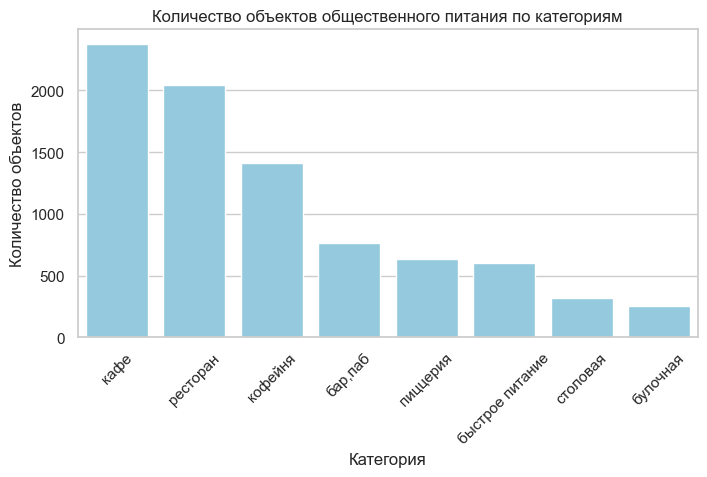

In [24]:
# Настраиваем стиль графика
sns.set(style="whitegrid")

# Создаем столбчатую диаграмму
plt.figure(figsize=(8, 4))
bar_plot = sns.barplot(x=category_counts.index, y=category_counts.values, color='skyblue')

# Добавляем заголовок и метки осей
plt.title('Количество объектов общественного питания по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество объектов')
plt.xticks(rotation=45)

# Показываем график
plt.show()


Посмотрим на доли объектов общественного питания по категориям

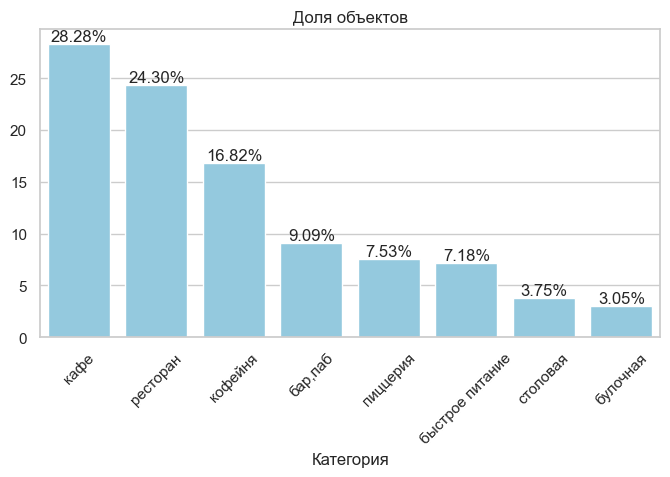

In [25]:
# Настраиваем стиль графика
sns.set(style="whitegrid")

# Создаем столбчатую диаграмму
plt.figure(figsize=(8, 4))
bar_plot = sns.barplot(x=category_percentages.index, y=category_percentages.values, color='skyblue')

# Добавляем заголовок и метки осей
plt.title('Доля объектов')
plt.xlabel('Категория')
plt.xticks(rotation=45)

# Добавляем значения над каждым столбцом
for index, value in enumerate(category_percentages.values):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

# Показываем график
plt.show()

В данных представлены такие категории как: кафе, ресторан, кофейня, бар,паб, пиццерия, быстрое питание, столовая и булочная. 
Топ 3 самых популяных категорий по количеству заведений:
- кафе 2376;
- рестораны 2042;
- кофейни 1413;
  
Наименьшее количество заведений:
- столовые 315;
- булочные 256;

---

### Задача 2

Исследуем распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы.

Проведем подсчет всех административных районов Москвы, которые присутствуют в данных и сопроводим визуализацией.

In [26]:
# Подсчет количества заведений по районам
district_counts = df['district'].value_counts()

# Вычисляем процентные доли
district_percentages = (df['district'].value_counts(normalize=True) * 100).round(2)

In [27]:
# Создаем новый датафрейм из двух серий
result_district = pd.DataFrame({
    'count': district_counts,
    'percentage': district_percentages
})

# Сбрасываем индекс для удобства
result_district.reset_index(inplace=True)

# Переименовываем столбцы для ясности
result_district.columns = ['district', 'count', 'percentage']

# Выводим результат
display(result_district)

,district,count,percentage
0,Центральный административный округ,2242,26.68
1,Северный административный округ,898,10.69
2,Южный административный округ,892,10.62
3,Северо-Восточный административный округ,890,10.59
4,Западный административный округ,850,10.12
5,Восточный административный округ,798,9.50
6,Юго-Восточный административный округ,714,8.50
7,Юго-Западный административный округ,709,8.44
8,Северо-Западный административный округ,409,4.87


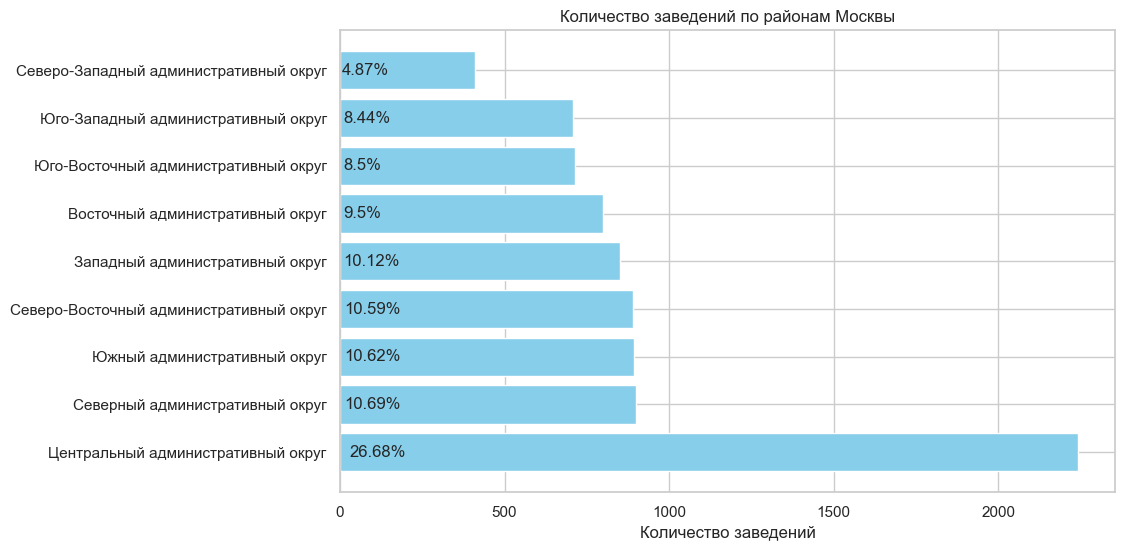

In [28]:
# Установка размера графика
plt.figure(figsize=(10, 6))

# Построение горизонтальной столбчатой диаграммы для количества заведений
plt.barh(result_district['district'], result_district['count'], color='skyblue', label='Количество')

# Добавление второго графика для процентного соотношения
for index, value in enumerate(result_district['percentage']):
    plt.text(value + 1, index, f'{value}%', va='center')

# Настройка заголовков и меток осей
plt.xlabel('Количество заведений')
plt.title('Количество заведений по районам Москвы')

# Показать график
plt.show()

Чтобы проанализировать распределение заведений по категориям в ЦАО, сначала отфильтруем данные и подсчитаем количество заведений по категориям в Центральном округе, затем выполним визуализацию.

In [29]:
# Фильтруем данные для Центрального административного округа
central_district = df[df['district'].str.contains('Центральный', na=False)]

# Группируем данные по категориям
central_district_counts = central_district['category'].value_counts()
display(central_district_counts)

category
ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: count, dtype: int64

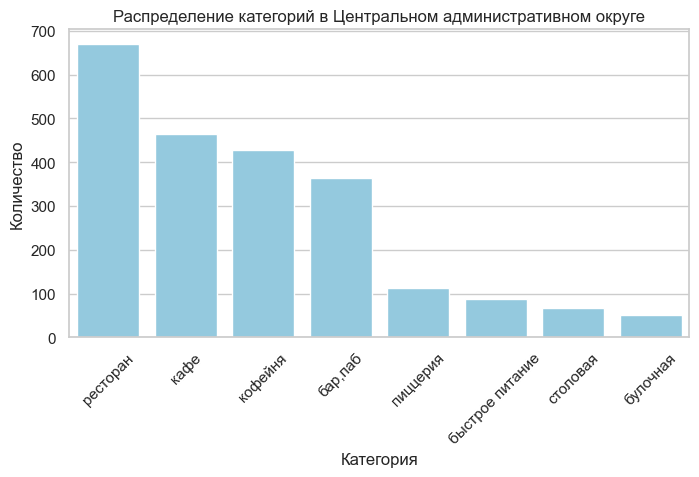

In [30]:
# Визуализация распределения заведений по категориям
plt.figure(figsize=(8, 4))

# Построение столбчатой диаграммы
sns.barplot(x=central_district_counts.index, y=central_district_counts.values, color='skyblue')

# Настройка заголовка и меток осей
plt.title('Распределение категорий в Центральном административном округе')
plt.xlabel('Категория')
plt.ylabel('Количество')

# Поворот меток по оси X
plt.xticks(rotation=45)

# Отображение графика
plt.show()


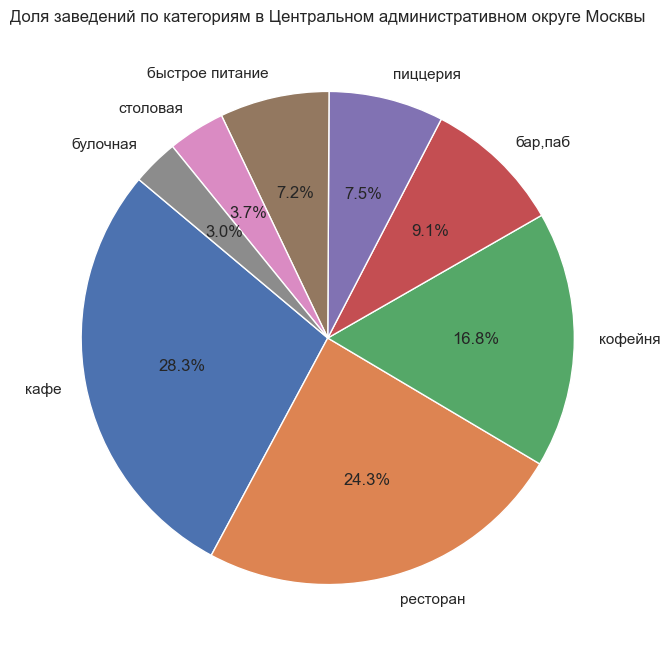

In [31]:
# Настройка размера фигуры
plt.figure(figsize=(7, 8))

# Построение круговой диаграммы
plt.pie(
    category_counts.values,
    labels=category_counts.index,
    autopct='%1.1f%%',
    startangle=140
)

# Заголовок графика
plt.title('Доля заведений по категориям в Центральном административном округе Москвы')

# Установка равных осей
plt.axis('equal')  


plt.show()

В данных выделяются 12 административных округов: Центральный, Северный, Южный, Северо-Восточный, Западный, Восточный, Юго-Восточный, Юго-Западный, Северо-Западный.      

Центральный административный округ занимает лидирующую позицию по количеству заведений, что обусловлено его высокой плотностью населения и развитой инфраструктурой. Наименьшее количество заведений в Северо-Западном административный округе, что может быть связано с его низкой плотностью населения и менее развитой инфраструктурой по сравнению с центральными районами.

При отдельном распределении заведений каждой категории в Центральном административном округе Москвы можно заметить, что рестораны и кафе составляют наибольшую долю заведений(24% и 28%), что подчеркивает его статус как одного из главных центров гастрономической культуры Москвы.

---

### Задача 3

Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения.

Для начала подсчитаем общее количество заведений и их распределение по типам (сетевые и несетевые). Для наглядности построим круговую диаграмму для распределения сетевых и несетевых заведений.

In [32]:
# Подсчет количества сетевых и несетевых заведений
chain_counts = df['chain'].value_counts()  # Считаем количество сетевых и несетевых заведений
total_count = chain_counts.sum()  # Общее количество заведений

# Вывод результатов
print(f"Сетевые заведения: {chain_counts[1]} ({(chain_counts[1] / total_count) * 100:.2f}%)")
print(f"Несетевые заведения: {chain_counts[0]} ({(chain_counts[0] / total_count) * 100:.2f}%)")


Сетевые заведения: 3203 (38.12%)
Несетевые заведения: 5199 (61.88%)


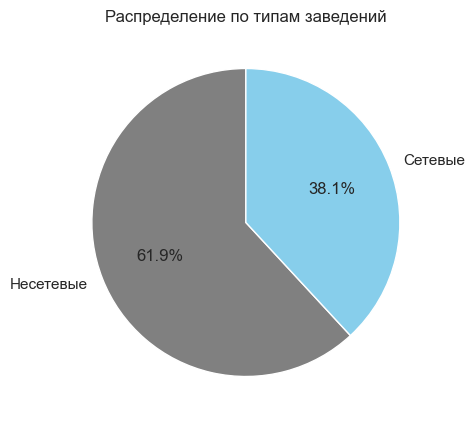

In [33]:
#Настраиваем размер
plt.figure(figsize=(5, 5))  

# Построение круговой диаграммы
plt.pie(chain_counts, autopct='%1.1f%%', labels=['Несетевые', 'Сетевые'], 
        colors=['gray', 'skyblue'], startangle=90)

# Настройка заголовка
plt.title('Распределение по типам заведений')

# Отображение диаграммы
plt.show()

Сравнение количества сетевых и несетевых заведений показывает, что несетевые заведения преобладают.


Исследуем данные в разрезе категорий заведений и визуализируем результаты с помощью комбинированного графика.

In [34]:
# Подсчет количества сетевых и несетевых заведений по категориям
category_counts = df.groupby(['category', 'chain']).size().unstack(fill_value=0)

# Переименование столбцов для удобства
category_counts.columns = ['Non-chain', 'Chain']

# Вычисление абсолютных и относительных долей
category_counts['Total'] = category_counts['Non-chain'] + category_counts['Chain']
category_counts['Chain Share (%)'] = (category_counts['Chain'] / category_counts['Total']) * 100
category_counts['Non-chain Share (%)'] = (category_counts['Non-chain'] / category_counts['Total']) * 100

# Сортировка по столбцу Total в порядке убывания
category_counts = category_counts.sort_values(by='Total', ascending=False)

# Вывод результатов в удобном формате
display(category_counts)

,Non-chain,Chain,Total,Chain Share (%),Non-chain Share (%)
category,,,,,
кафе,1597,779,2376,32.786195,67.213805
ресторан,1313,729,2042,35.700294,64.299706
кофейня,693,720,1413,50.955414,49.044586
"бар,паб",596,168,764,21.989529,78.010471
пиццерия,303,330,633,52.132701,47.867299
быстрое питание,371,232,603,38.474295,61.525705
столовая,227,88,315,27.936508,72.063492
булочная,99,157,256,61.328125,38.671875


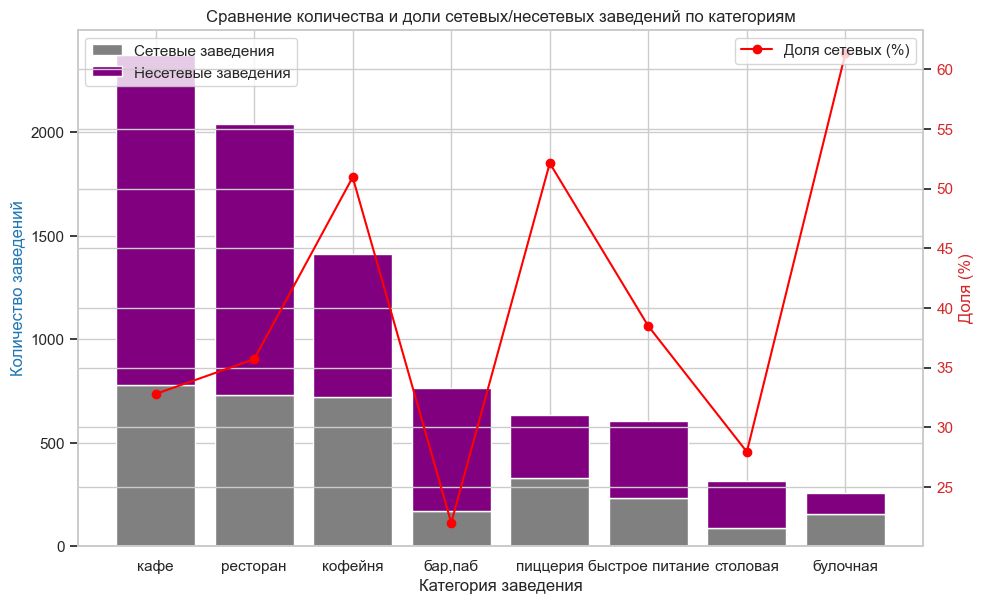

In [35]:
#Построим столбчатую диаграмму отношений сетевых и несетевых заведений
fig, ax1 = plt.subplots(figsize=(10, 6))

# Настройка первого оси
color = 'tab:blue'
ax1.set_xlabel('Категория заведения')
ax1.set_ylabel('Количество заведений', color=color)

# Построение столбчатой диаграммы
ax1.bar(category_counts.index, category_counts['Chain'], 
        color='gray', label='Сетевые заведения')
ax1.bar(category_counts.index, category_counts['Non-chain'], 
        bottom=category_counts['Chain'], 
        color='purple', label='Несетевые заведения')

# Настройка второй оси
ax2 = ax1.twinx()  
ax2.set_ylabel('Доля (%)', color='tab:red')  
ax2.plot(category_counts.index, category_counts['Chain Share (%)'], 
         color='red', marker='o', label='Доля сетевых (%)')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Завершение оформления графика
fig.tight_layout()  
plt.title('Сравнение количества и доли сетевых/несетевых заведений по категориям')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

Исследуем какие категории заведений чаще являются сетевыми. 

In [36]:
# Сортировка по столбцу Chain
category_counts = category_counts.sort_values(by='Chain Share (%)', ascending=False)

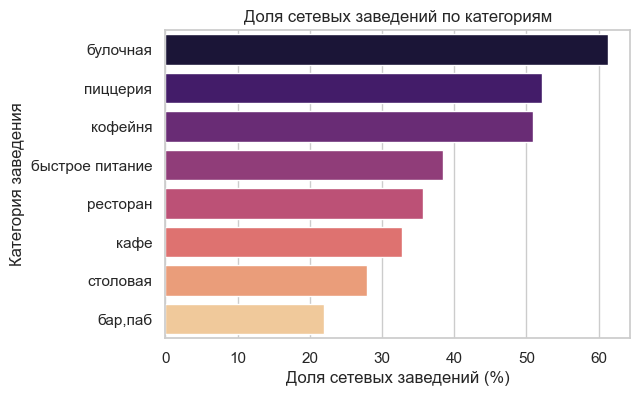

In [37]:
# Настраиваем стиль графика
sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
bar_plot = sns.barplot(
    x='Chain Share (%)', 
    y=category_counts.index, 
    hue=category_counts.index,
    data=category_counts, 
    palette='magma',
    legend=False  
)
plt.title('Доля сетевых заведений по категориям')
plt.xlabel('Доля сетевых заведений (%)')
plt.ylabel('Категория заведения')

plt.show()


Сравнение количества сетевых и несетевых заведений показывает, что в большинстве случаев несетевые заведения преобладают.
- Сетевые заведения: 38.12%
- Несетевые заведения: 61.88%

Несетевые заведения в большинстве категорий составляют более 50% от общего числа заведений. Например, в категории кафе доля несетевых составляет 67.21%, а в категории баров и пабов — 78.01%.
Наиболее высокую долю сетевых заведений можно наблюдать в следующих категориях:
- Булочная: Доля сетевых составляет 61.33%.
- Пиццерия: Доля сетевых составляет 52.13%.
- Кофейня: Доля сетевых составляет 50.96%.

В целом, наблюдается преобладание несетевых заведений, особенно в таких категориях как бары и рестораны. Сетевые заведения занимают значительное место в категориях быстрого питания и специализированных заведениях, таких как булочные и кофейни, что указывает на их успешную адаптацию к потребительскому спросу и маркетинговым стратегиям

---

### Задача 4

Исследуем количество посадочных мест в заведениях.


Расчитаем среднее количество мест по категориям

In [38]:
# Группировка данных для расчета среднего количества мест по категориям
mean_seats = df.groupby('category')['seats'].mean().reset_index()

# Сортировка по значению seats в порядке убывания
mean_seats_sorted = mean_seats.sort_values(by='seats', ascending=False)

# Отображение отсортированных данных
display(mean_seats_sorted)

,category,seats
0,"бар,паб",124.477516
6,ресторан,121.892041
4,кофейня,111.199734
7,столовая,99.750000
2,быстрое питание,98.891117
3,кафе,97.365653
5,пиццерия,94.496487
1,булочная,89.385135


Чтобы выбросы не влияли на данные посмотрим на медиану

In [39]:
# Группировка данных для расчета медианы количества мест по категориям
median_seats = df.groupby('category')['seats'].median().reset_index()

# Сортировка по значению seats в порядке убывания
median_seats_sorted = median_seats.sort_values(by='seats', ascending=False)

# Отображение отсортированных данных
display(median_seats_sorted)

,category,seats
6,ресторан,86.0
0,"бар,паб",82.0
4,кофейня,80.0
7,столовая,75.5
2,быстрое питание,65.0
3,кафе,60.0
5,пиццерия,55.0
1,булочная,50.0


Так как некоторые категории вызывают сомнения (слишком высокие показатели для булочной и кофейни), посмотрим на аномальные значения или выбросы. Для выявления выбросов можно использовать визуализацию с помощью boxplot

In [40]:
#Вычисление квартилей
Q1 = df['seats'].quantile(0.25)
Q3 = df['seats'].quantile(0.75)
#Вычисление межквартильного размаха
IQR = Q3 - Q1
#Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Выявление выбросов
outliers = df[(df['seats'] < lower_bound) | (df['seats'] > upper_bound)]
outliers.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
127,8dd9dbd5defd45dbbebae8cecfdde80b,арарат,кафе,"москва, дмитровское шоссе, 165, корп. 1",Северо-Восточный административный округ,"ежедневно, 06:00–20:00",4.2,1,350.0,NaN,NaN,NaN,NaN,False
171,4b1169021ed44f77a0cc02a0c095cb43,one price coffee,кофейня,"москва, дмитровское шоссе, 163а, корп. 1",Северо-Восточный административный округ,"ежедневно, 10:00–22:00",4.0,1,350.0,NaN,NaN,NaN,NaN,False
176,34fd25c6f73141d6967f2d9c72bf5f61,вуди пицца,пиццерия,"москва, дмитровское шоссе, 107а, корп. 1",Северный административный округ,"пн-пт 08:00–21:00; сб,вс 09:00–21:00",4.0,0,350.0,средние,Средний счёт:400–600 ₽,500.0,NaN,False
194,ec6f40b747fc4b45bbb0102d12ce8eef,ленкорань,кафе,"москва, дмитровское шоссе, 165, корп. 1",Северо-Восточный административный округ,"ежедневно, 06:00–20:00",1.4,0,350.0,NaN,NaN,NaN,NaN,False
216,4f4e35b59a6a4d96a67780fd1694179b,грузинский бульвар,быстрое питание,"москва, дмитровское шоссе, 163а, корп. 1",Северо-Восточный административный округ,"ежедневно, 10:00–22:00",4.0,0,350.0,NaN,NaN,NaN,NaN,False


Приведем для каждой категории заведений наиболее типичное для него количество посадочных мест после удаления выбросов

In [41]:
# Удаление выбросов из основного DataFrame
filtered_df = df[(df['seats'] >= lower_bound) & (df['seats'] <= upper_bound)]

# Среднее количество мест после фильтрации выбросов
median_seats_filtered = filtered_df.groupby('category')['seats'].median().reset_index()
median_seats_filtered_sorted = median_seats_filtered.sort_values(by='seats', ascending=False)
display(median_seats_filtered_sorted)

,category,seats
6,ресторан,80.0
0,"бар,паб",76.0
4,кофейня,70.0
7,столовая,70.0
2,быстрое питание,60.0
3,кафе,55.0
5,пиццерия,50.0
1,булочная,48.0


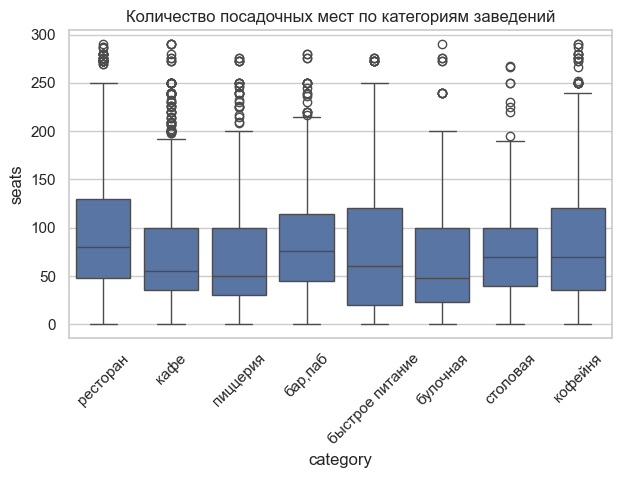

In [42]:
# Визуализация количества мест с помощью boxplot
plt.figure(figsize=(7, 4))
sns.boxplot(x='category', y='seats', data=filtered_df)
plt.xticks(rotation=45)
plt.title('Количество посадочных мест по категориям заведений')

plt.show()

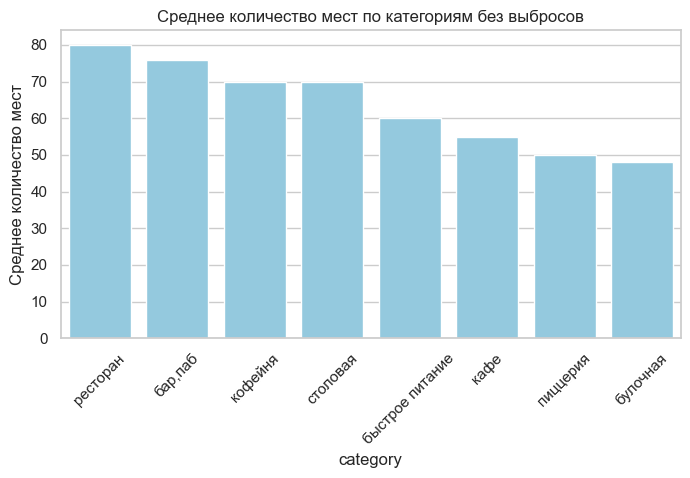

In [43]:
# Визуализация среднего количества мест
plt.figure(figsize=(8, 4))
sns.barplot(x='category', y='seats', data=median_seats_filtered_sorted, color='skyblue')
plt.title('Среднее количество мест по категориям без выбросов')
plt.xticks(rotation=45)
plt.ylabel('Среднее количество мест')
plt.show()

В данных были обнаружены аномалии, что может указывать на наличие ошибок в них, наличие аномалий и выбросов. После работы с аномалиями приведем для каждой категории заведений наиболее типичное для него количество посадочных мест:
- ресторан	80 мест;
- бар,паб	76 мест;
- кофейня	70 мест;
- быстрое питание 60 мест;
- столовая	70 мест;
- пиццерия	50 мест;
- кафе	55  мест;
- булочная	48 мест.

---

### Задача 5

Исследуем распределение средних рейтингов по категориям заведений. 

Используем метод groupby для группировки данных по категориям заведений и расчета медианы значений рейтинга.

In [44]:
# Расчет медианы рейтингов по категориям
average_ratings = df.groupby('category')['rating'].mean().sort_values(ascending=False)
display(round(average_ratings,2))

category
бар,паб            4.39
пиццерия           4.30
ресторан           4.29
кофейня            4.28
булочная           4.27
столовая           4.21
кафе               4.12
быстрое питание    4.05
Name: rating, dtype: float64

In [45]:
description = df['rating'].describe()
display(description)

count    8402.000000
mean        4.230017
std         0.470320
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

Наглядно сравним средние рейтинги между различными категориями заведений.

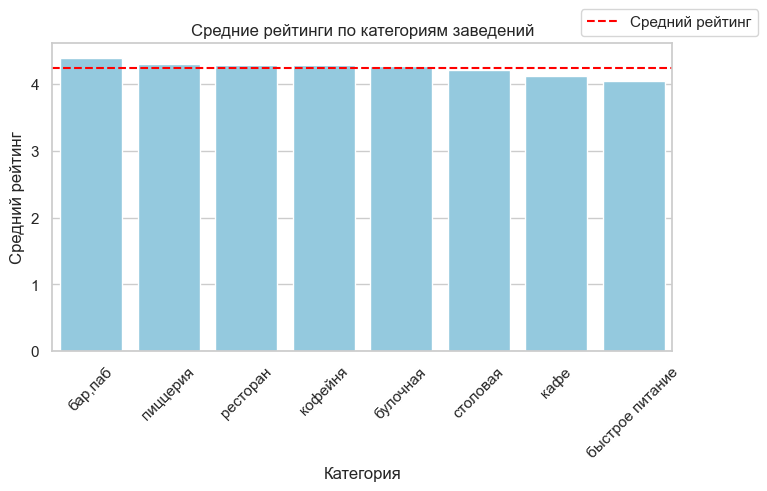

In [46]:
# Настраиваем стиль графика
sns.set(style="whitegrid")

# Создаем столбчатую диаграмму
plt.figure(figsize=(8, 4))
bar_plot = sns.barplot(x=average_ratings.index, y=average_ratings.values, color='skyblue')

# Добавляем горизонтальную линию для сравнения
mean_rating = np.mean(average_ratings.values)  # Вычисляем средний рейтинг
plt.axhline(y=mean_rating, color='red', linestyle='--', label='Средний рейтинг')  

plt.xticks(rotation=45)
plt.title('Средние рейтинги по категориям заведений')
plt.xlabel('Категория')
plt.ylabel('Средний рейтинг')
# Добавляем легенду
plt.legend(loc='lower right', bbox_to_anchor=(1.15, 1))
plt.show()

Посмотрим на распределение рейтингов внутри каждой категории, включая медиану и выбросы.

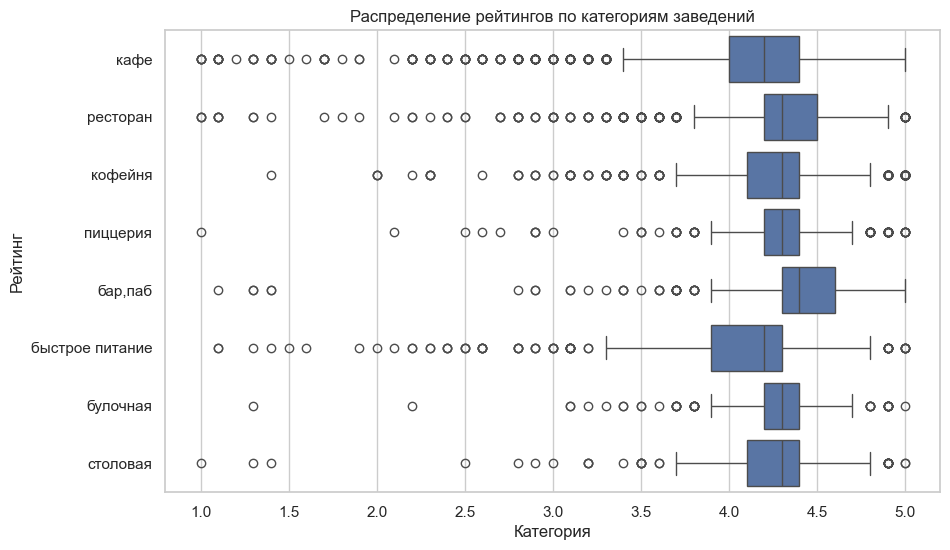

In [47]:
# Настройка графика
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Создание boxplot
sns.boxplot(y='category', x='rating', data=df)

# Настройка заголовка и меток осей
plt.title('Распределение рейтингов по категориям заведений')
plt.xlabel('Категория')
plt.ylabel('Рейтинг')

# Показать график
plt.show()

Коробчатая диаграмма показывает разброс значений внутри каждой категории. Например, в категории "Пиццерия" могут быть как очень низкие, так и высокие оценки, что говорит о большой вариативности качества среди таких заведений.
Средние рейтинги значительно варьируются между разными типами заведений. Это может быть связано с различиями в качестве обслуживания, атмосфере и ценовой политике.

---

### Задача 6

Изучим, с какими данными показывают самую сильную корреляцию рейтинги заведений. 

In [48]:
#Расчитаем корреляцию с использованием phi_k
variables_for_phik = ['rating', 'category', 'district', 'chain', 'seats', 'price', 'is_24_7']
interval_cols = ['rating', 'chain', 'seats']
phik_matrix = df[variables_for_phik].phik_matrix(interval_cols=interval_cols)
display(phik_matrix)

,rating,category,district,chain,seats,price,is_24_7
rating,1.000000,0.189716,0.200761,0.107833,0.000000,0.220295,0.150365
category,0.189716,1.000000,0.174584,0.266000,0.048923,0.566933,0.244815
district,0.200761,0.174584,1.000000,0.064473,0.352440,0.202787,0.076357
chain,0.107833,0.266000,0.064473,1.000000,0.056523,0.218211,0.043488
seats,0.000000,0.048923,0.352440,0.056523,1.000000,0.088146,0.043193
price,0.220295,0.566933,0.202787,0.218211,0.088146,1.000000,0.084183
is_24_7,0.150365,0.244815,0.076357,0.043488,0.043193,0.084183,1.000000


Составим тепловую карту для отображения матрицы корреляции. Это поможет лучше понять взаимосвязи между различными переменными.

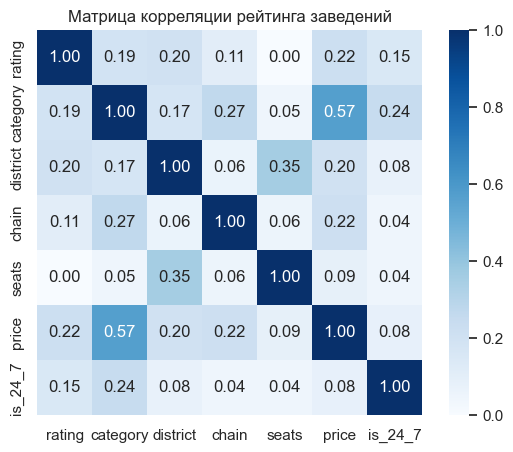

In [49]:
#Визуализация матрицы корреляции
plt.figure(figsize=(7, 5))
sns.heatmap(phik_matrix, annot=True, fmt=".2f", cmap='Blues', square=True)
plt.title('Матрица корреляции рейтинга заведений')
plt.show()


Наиболее сильная корреляция наблюдается между рейтингом заведений и их ценовой категорией. Гистограмма поможет визуализировать распределение рейтингов по различным ценовым категориям.

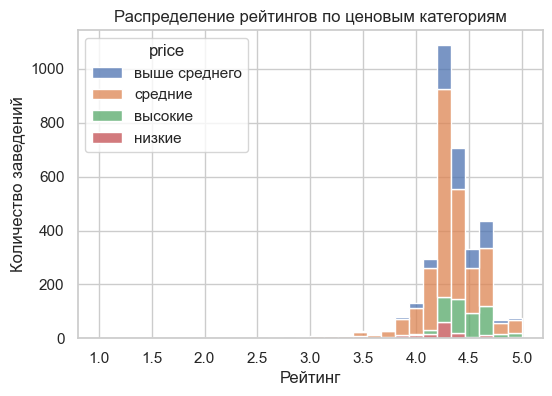

In [50]:
#Гистограмма рейтингов по ценовым категориям
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='rating', hue='price', multiple='stack', bins=30)

# Настройка заголовка и меток осей
plt.title('Распределение рейтингов по ценовым категориям')
plt.xlabel('Рейтинг')
plt.ylabel('Количество заведений')
plt.show()

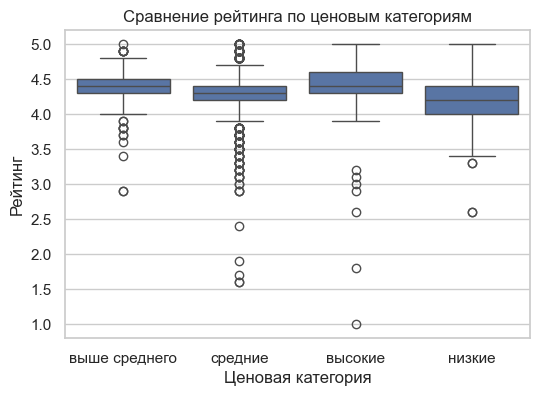

In [51]:
# Настройка графика
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")

# Создание boxplot
sns.boxplot(data=df, x='price', y='rating')

# Настройка заголовка и меток осей
plt.title('Сравнение рейтинга по ценовым категориям')
plt.xlabel('Ценовая категория')
plt.ylabel('Рейтинг')

# Показать график
plt.show()

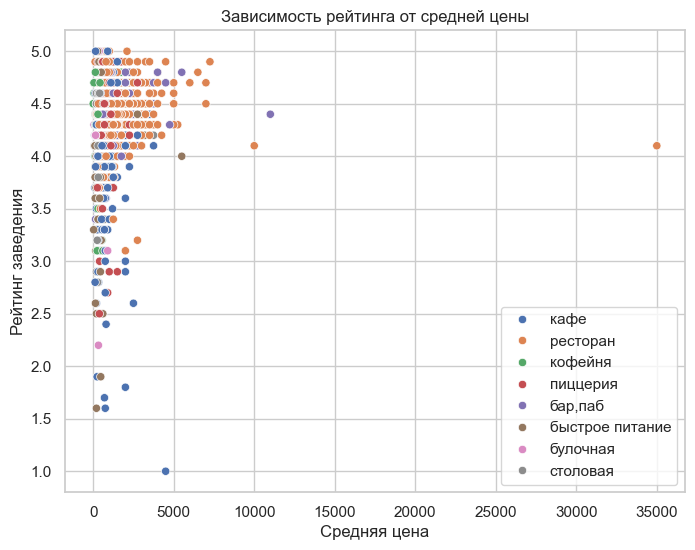

In [52]:
#Визуализация зависимости рейтинга от средней цены
# Настройка графика
plt.figure(figsize=(8, 6))

# Построение диаграммы рассеяния
sns.scatterplot(x='middle_avg_bill', y='rating', hue='category', data=df)

# Настройка заголовка и меток
plt.title('Зависимость рейтинга от средней цены')
plt.xlabel('Средняя цена')
plt.ylabel('Рейтинг заведения')
plt.legend()

plt.show()

Так как значения в матрице всегда положительные, мы можем лишь говорить о силе связи между переменными.

Наиболее заметная корреляция наблюдается между ценой и категорией заведений, с коэффициентом корреляции r=0.57. Это может означает, что с увеличением цен на заведения, увеличивается и их категория.

Для анализа корреляции между рейтингами заведений и различными факторами, можно рассмотреть следующие показатели:
- Рейтинг и цена: Корреляция между рейтингом заведения и ценовой категорией составляет 0.22. Это может означать умеренную связь между рейтингом заведения и ценовой категорией.
- Рейтинг и категория: Корреляция с категорией заведения составляет 0.19, это может свидетельствовать о том, что определенные категории (например, рестораны или кафе) могут иметь более высокие рейтинги по сравнению с другими.
- Рейтинг и район: Корреляция с административным районом составляет 0.20, что говорит о том, что расположение заведения может влиять на его рейтинг.
- Рейтинг и сеть: Корреляция с тем, является ли заведение сетевым слабая, составляет 0.11, это указывает на слабую связь, что может означать, что сетевые заведения не обязательно имеют более высокие рейтинги.
- Рейтинг и количество мест: Корреляция с количеством посадочных мест равна 0.00, что указывает на отсутствие связи.
- Рейтинг и круглосуточный режим работы: Корреляция с признаком круглосуточного обслуживания составляет 0.15, связь не является сильной.

Наиболее сильная корреляция наблюдается между рейтингом заведений и их ценовой категорией, а также с категорией заведения.


---

### Задача 7

Сгруппируем данные по названиям заведений и найдем топ-15 популярных сетей в Москве.

Для анализа популярности сетей заведений по количеству заведений этой сети в регионе создадим отдельный датафрейм, в котором сгруппируем данные по названиям, поставим фильтр на сетевые заведения и выделим топ-15 популярных сетей.

In [53]:
# Группировка по названию сети
chain_counts_df = df.groupby('name').agg(
    count=('id', 'count'),
    chain=('chain', 'mean'),
    average_rating=('rating', 'mean'),
    category=('category', 'first')
)

# Фильтр для сетевых заведений
chain_counts_df = chain_counts_df[chain_counts_df['chain']==1]

# Сортировка по количеству заведений
top_places = chain_counts_df.sort_values(by='count', ascending=False).head(15)
# Сброс индексов после сортировки
display(top_places)

,count,chain,average_rating,category
name,,,,
шоколадница,120,1.0,4.177500,кофейня
додо пицца,74,1.0,4.286486,пиццерия
яндекс лавка,69,1.0,3.872464,ресторан
cofix,65,1.0,4.075385,кофейня
prime,50,1.0,4.116000,ресторан
хинкальная,44,1.0,4.322727,быстрое питание
кофепорт,42,1.0,4.147619,кофейня
кулинарная лавка братьев караваевых,39,1.0,4.394872,кафе
теремок,38,1.0,4.123684,ресторан


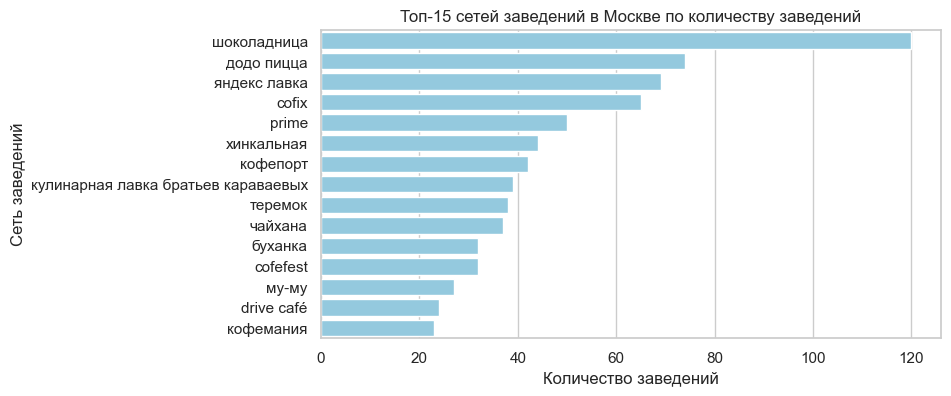

In [54]:
# Создаем столбчатую диаграмму
plt.figure(figsize=(8, 4))
bar_plot = sns.barplot(data=top_places, 
        y=top_places.index, x='count', color='skyblue')

# Настройка заголовка и меток
plt.title('Топ-15 сетей заведений в Москве по количеству заведений')
plt.xlabel('Количество заведений')
plt.ylabel('Сеть заведений')

plt.show()

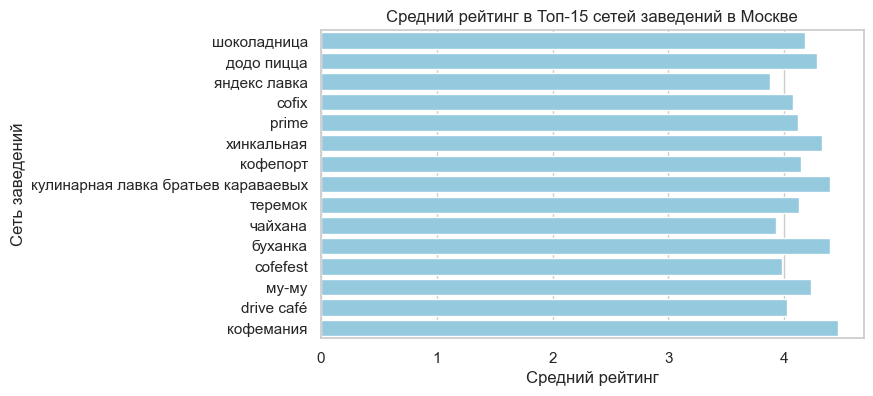

In [55]:
#Визуализируем данные
plt.figure(figsize=(7, 4))
sns.barplot(data=top_places, x='average_rating', 
         y=top_places.index, color='skyblue')

# Настройка заголовка и меток
plt.title('Средний рейтинг в Топ-15 сетей заведений в Москве')
plt.xlabel('Средний рейтинг')
plt.ylabel('Сеть заведений')

plt.show()

Посмотрим на распределение категорий среди топ-15 сетей.

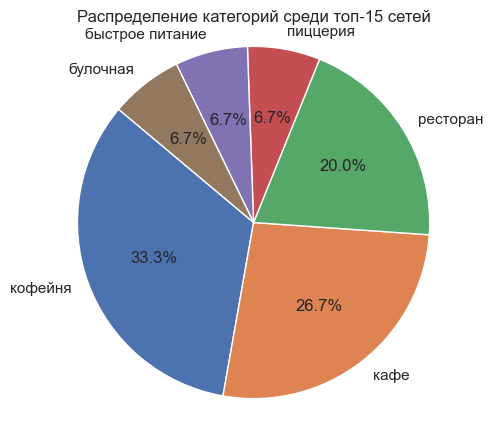

In [56]:
#Визуализация распределение категорий
plt.figure(figsize=(5, 5))
category_counts = top_places['category'].value_counts()
plt.pie(category_counts, labels=category_counts.index, 
        autopct='%1.1f%%', startangle=140)
plt.title('Распределение категорий среди топ-15 сетей')
plt.axis('equal') 

plt.show()

  Наблюдается разнообразие сетевых заведений, с акцентом на кофейни и рестораны быстрого питания. Популярность этих категорий может быть связана с динамичным образом жизни горожан, которые ищут удобные и быстрые решения для питания.
  
  Наиболее представленными категориями являются:
  - кофейни 33.3% (Шоколадница, Сofix, Кофепорт)
  - кафе 26.7 % (Кулинарная лавка братьев караваевых, Чайхана)
  - рестораны 20 % (Яндекс лавка, Prime, Теремок)
  
  Топ-5 заведений по количеству заведений:
- Шоколадница (120 заведений, кофейня)
- Додо пицца (74 заведений, пиццерия)
- Яндекс лавка (69 заведений, ресторан)
- Cofix (65 заведений, кофейня)
- Prime (50 заведений, ресторан)

---

### Задача 8

Изучим вариацию среднего чека заведения в зависимости от района Москвы. Проанализируем цены в Центральном административном округе и других и как удалённость от центра влияет на цены в заведениях.


Для начала вычислим средний чек для каждого района. Это можно сделать с помощью группировки данных. Для визуализации результатов используем библиотеку Seaborn:

In [57]:
# Группируем данные по району и вычисляем средний чек
avg_bill_by_area = df.groupby('district')['middle_avg_bill'].mean().reset_index()

# Сортируем по столбцу 'middle_avg_bill'
avg_bill_by_area.sort_values(by='middle_avg_bill', ascending=False, inplace=True)

display(avg_bill_by_area)

,district,middle_avg_bill
5,Центральный административный округ,1191.057547
1,Западный административный округ,1053.225490
2,Северный административный округ,927.959627
8,Южный административный округ,834.398089
4,Северо-Западный административный округ,822.222930
0,Восточный административный округ,820.626923
7,Юго-Западный административный округ,792.561702
3,Северо-Восточный административный округ,716.611296
6,Юго-Восточный административный округ,654.097938


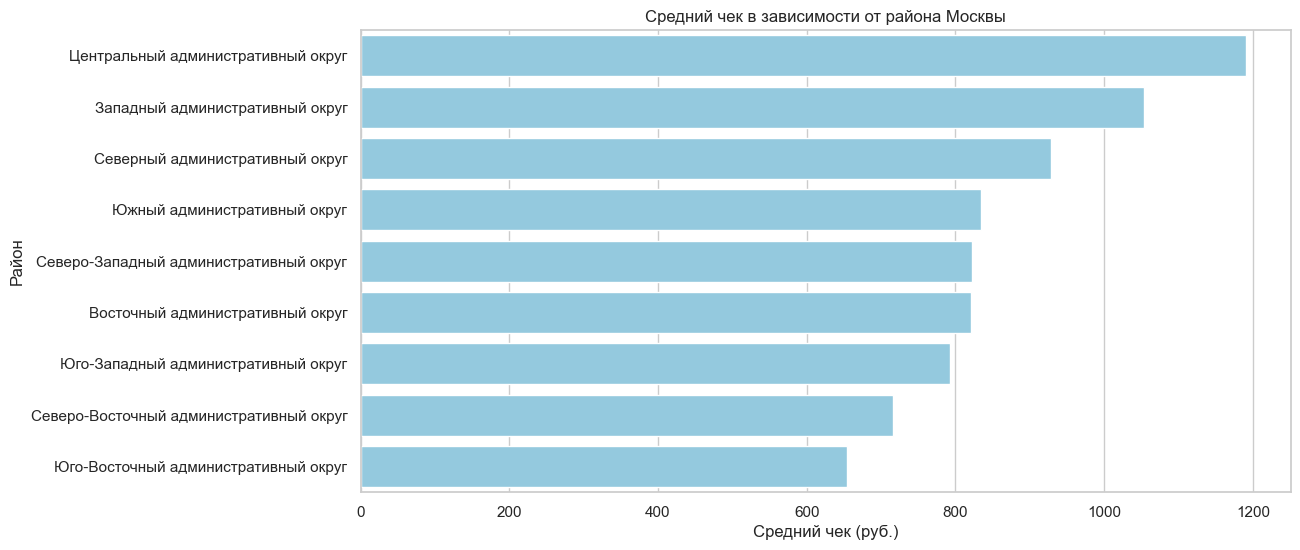

In [58]:
# Визуализируем средний чек по районам
plt.figure(figsize=(12, 6))

sns.barplot(
    data=avg_bill_by_area,
    x='middle_avg_bill',
    y='district',
    color='skyblue'
)

plt.title('Средний чек в зависимости от района Москвы')
plt.xlabel('Средний чек (руб.)')
plt.ylabel('Район')
plt.show()

Посмотрим на долю среднего чека Центрального административного округа (ЦАО) по сравнению с другими районами.

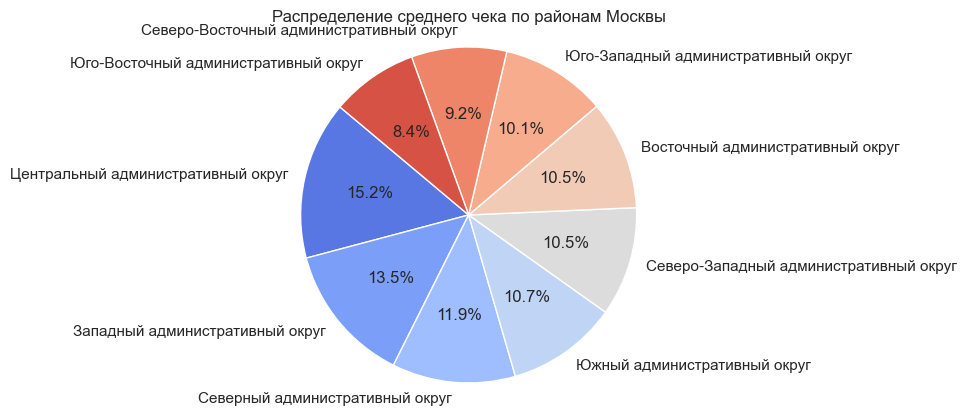

In [59]:
# Построение круговой диаграммы
plt.pie(avg_bill_by_area['middle_avg_bill'], 
        labels=avg_bill_by_area['district'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette('coolwarm', len(avg_bill_by_area)))

# Заголовок графика
plt.title('Распределение среднего чека по районам Москвы')

# Отображение графика
plt.axis('equal')  # Чтобы круговая диаграмма была кругом
plt.show()

Для более детального анализа можно выделить Центральный административный округ и сравнить его средний чек с другими районами:

In [60]:
# Фильтруем данные для ЦАО и других районов
caa_avg_bill = avg_bill_by_area[
    avg_bill_by_area['district'] == 'Центральный административный округ'
]

other_avg_bills = avg_bill_by_area[
    avg_bill_by_area['district'] != 'Центральный административный округ'
]

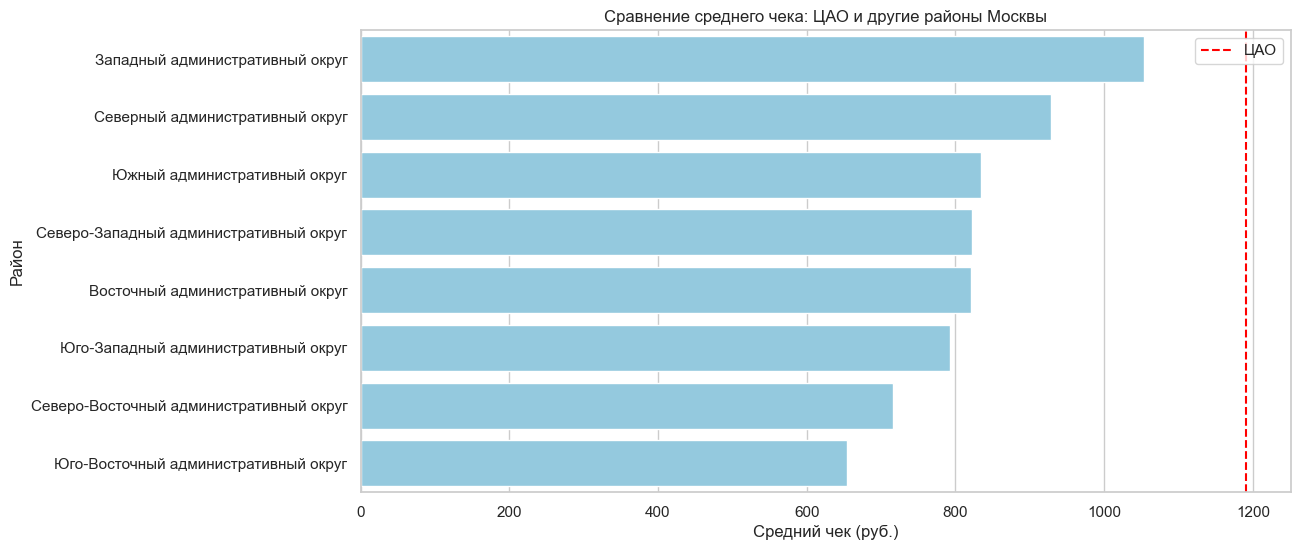

In [61]:
# Создание фигуры
plt.figure(figsize=(12, 6))

# Построение столбчатой диаграммы
sns.barplot(x='middle_avg_bill', y='district', 
            data=other_avg_bills, color='skyblue')

# Добавление вертикальной линии для среднего чека ЦАО
plt.axvline(caa_avg_bill['middle_avg_bill'].values[0], 
            color='red', 
            linestyle='--', 
            label='ЦАО')

# Настройка заголовка и меток осей
plt.title('Сравнение среднего чека: ЦАО и другие районы Москвы')
plt.xlabel('Средний чек (руб.)')
plt.ylabel('Район')

# Добавление легенды
plt.legend()


plt.show()


Изучение вариации среднего чека в зависимости от района Москвы показывает значительные различия в ценах на заведения общественного питания. В Центральном административном округе (ЦАО) средний чек составляет 1191 рубль, что значительно выше, чем в других округах города:
- Западный административный округ: 1053 рубля
- Северный административный округ: 928 рублей
- Южный административный округ: 834 рубля
- Северо-Западный административный округ: 822 рубля
- Восточный административный округ: 821 рубль
- Юго-Западный административный округ: 793 рубля
- Северо-Восточный административный округ: 717 рублей
- Юго-Восточный административный округ: 654 рубля

Удалённость от центра Москвы оказывает заметное влияние на средний чек в заведениях. В ЦАО сосредоточено множество ресторанов и кафе, предлагающих более широкий выбор блюд и более высокий уровень сервиса, что обуславливает более высокие цены.

Посчитаем средний чек по категориям заведений в Центральном административном округе

In [62]:
# Фильтруем данные для Центрального административного округа
filtered_df = df[df['district'] == 'Центральный административный округ']

# Группируем данные по категории и вычисляем средний чек
avg_bill_by_category = filtered_df.groupby('category')['middle_avg_bill'].mean().reset_index()

# Сортируем по столбцу 'middle_avg_bill'
avg_bill_by_category.sort_values(by='middle_avg_bill', ascending=False, inplace=True)

# Отображаем результаты
display(avg_bill_by_category)

,category,middle_avg_bill
6,ресторан,1561.059113
0,"бар,паб",1479.739884
1,булочная,1237.916667
5,пиццерия,1104.839506
4,кофейня,794.764706
3,кафе,765.176190
2,быстрое питание,532.081633
7,столовая,319.886364


---

### Промежуточный вывод


Анализ данных показал, что:
- Удалённость от центра Москвы оказывает заметное влияние на средний чек в заведениях. Самый высокий чек в ЦАО
- Наблюдается разнообразие сетевых заведений, с акцентом на кофейни и рестораны быстрого питания. Наиболее представленной категорией являются кофейни 33.3%
- Наиболее сильная корреляция наблюдается между рейтингом заведений и их ценовой категорией, а также с категорией заведения.
- В целом, наблюдается преобладание несетевых заведений, особенно в таких категориях как бары и рестораны. Сетевые заведения занимают значительное место в категориях быстрого питания и специализированных заведениях, таких как булочные и кофейни.
- Для сетевых заведений наиболее высокая доля в булочныхет 61.33
- Центральный административный округ занимает лидирующую позицию по количеству заведений, что обусловлено его высокой плотностью населения и развитой инфраструктурой. Наименьшее количество заведений в Северо-Западном административный округе
- Самая популяная категория по количеству заведений: 
кафе %.

# 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.

В ходе исследования проанализировали данные датасетов с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. 

### Общий обзор проделанной работы.
1. Познакомилимь с данными и изучили общую информацию о них, объединили данные двух датасетов в один.
2. Подготовили данные к исследовательскому анализу: проверили корретность типов данных и пропуски, проверили на явные и неявные дубликаты, создали новый столбец с информацией о круглосуточности работы заведения.

### Ответы на исследовательские вопросы
1. В данных выделяются 12 административных округов: Центральный, Северный, Южный, Северо-Восточный, Западный, Восточный, Юго-Восточный, Юго-Западный, Северо-Западный.
Центральный административный округ занимает лидирующую позицию по количеству заведений, что обусловлено его высокой плотностью населения и развитой инфраструктурой. Наименьшее количество заведений в Северо-Западном административный округе, что может быть связано с его низкой плотностью населения и менее развитой инфраструктурой по сравнению с центральными районами.
2. Сравнение количества сетевых и несетевых заведений показывает, что в большинстве случаев несетевые заведения преобладают: сетевые заведения: 38.12%; несетевые заведения: 61.88%.
Наиболее высокую долю сетевых заведений можно наблюдать в следующих категориях: булочная 61.33%, пиццерия 52.13%, кофейня: 50.96%.
3. В данных были обнаружены аномалии, что может указывать на наличие ошибок в них, наличие аномалий и выбросов. После работы с аномалиями приведем для каждой категории заведений наиболее типичное для него количество посадочных мест: 
- ресторан 80 мест;
- бар,паб 76 мест;
- кофейня 70 мест;
- быстрое питание 60 мест;
- столовая 70 мест;
- пиццерия 50 мест;
- кафе 55 мест;
- булочная 48 мест.
4.  Средние рейтинги значительно варьируются между разными типами заведений. Это может быть связано с различиями в качестве обслуживания, атмосфере и ценовой политике.
5.  Была выявлена корреляция между рейтингом заведения и ценовой категорией составляет 0.22, это может означать, что существует связь между рейтингом и  категорией заведения.
6.  Наиболее представленной категорией являются кофейни 33.3%, среди которых выделяются такие сети, как "Шоколадница", "Cofix", "Кофепорт" и "Кофемания". Это говорит о высокой популярности кофе и сопутствующих продуктов.

Можем выделить топ-3 категорий по представленности:
- кофейни 33.3% (Шоколадница, Сofix, Кофепорт)
- кафе 26.7 % (Кулинарная лавка братьев караваевых, Чайхана)
- рестораны 20 % (Яндекс лавка, Prime, Теремок)

И топ-5 заведений по представленности:
- Шоколадница (120 заведений, кофейня)
- Додо пицца (74 заведений, пиццерия)
- Яндекс лавка (69 заведений, ресторан)
- Cofix (65 заведений, кофейня)
- Prime (50 заведений, ресторан)
7.  Изучение вариации среднего чека в зависимости от района Москвы показывает значительные различия в ценах на заведения общественного питания. В Центральном административном округе (ЦАО) средний чек составляет 1191 рубль, что значительно выше, чем в других округах города

### Рекомендации на основе анализа данных.
С учетом того, что кафе, рестораны  и кофейни  являются наиболее популярными категориями, Инвесторам из фонда "Shut Up and Take My Money" рекомендуется рассмотреть открытие кофейни или ресторана в Центральном административном округе Москвы с акцентом на высокое качество обслуживания и разумную ценовую политику. Учитывая текущие тенденции на рынке и предпочтения потребителей, это может стать успешным шагом в их новом бизнесе. В частности, можно:
- Открыть специализированные кафе с уникальными концепциями (например, тематические или экологически чистые).
- Развивать кофейни с акцентом на высококачественные сорта кофе и уникальные десерты.
- Так как процент представленности сетевых заведений составляет 61.88% рауионально рассмотреть вариант открытия сетевого заведения, со среднем количеством мест 50-55 мест. Можно обратить внимание на наиболее представленные сети в категории кофеен: Шоколадница, Cofix, Кофепорт, Кофемания. 
- Можно расчитывать на средний чек для кофейни в Центральном административном округе Москвы 795 руб.

С учетом вышеизложенного, открытие сетевого заведения в Центральном округе с акцентом на уникальность и качество может стать успешным шагом для инвесторов.


<a id="results"></a>
[В начало](#start)